# Final Exam Project Submission

### Course: COMPSCIX433.6-021
#### Submission Due Date: Thursday August 24, 2023 

### Title: Uncovering Insights: A Data-driven Analysis & Visualization of Insurance Data

### Insurance Dataset
> Provides customer insurance data to help predict if the customer will be interested in Vehicle Insurance

### Team Members: Ryan Nichols and Joe Fernandez

### Problem Statement

### Context :

Insurance companies that sell life, health, and property and casualty insurance are using machine learning (ML) to drive improvements in customer service, fraud detection, and operational efficiency. The data provided by an Insurance company which is not excluded from other companies to getting advantage of ML. This company provides Health Insurance to its customers. We can build a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

### Goal : Predict if the policyholders (customers) will be interested in Vehicle Insurance

Reference: https://www.kaggle.com/datasets/arashnic/imbalanced-data-practice

### Task:

> #### 1. Perform an Exploratory Data Analysis and visualize the data
> #### 2. Apply Machine Learning Models learned in the class and make predictions
> #### 3. Provide conclusion based on the results
> #### 4. Outline an approach to convert the learning into a business solution
> 
### Available Datasets:
> Use `insurance_train.csv` as Training dataset to apply various ML models
>
> Use `insurance_test.csv` as Test dataset to validate the accuracy of the ML models 

In [34]:
# Import required Python Packages to perform exploratory data analysis and visualize the data
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#### Load the training dataset

In [64]:
df_train = pd.read_csv("insurance_train.csv")
df_test = pd.read_csv("insurance_test.csv")

In [31]:
df_train.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
5,295775,Female,25,1,25.0,1,< 1 Year,No,27954.0,152.0,23,0
6,71711,Male,51,1,8.0,0,1-2 Year,Yes,2630.0,26.0,209,0
7,331781,Male,38,1,28.0,1,1-2 Year,No,2630.0,26.0,51,0
8,290704,Female,45,1,28.0,0,1-2 Year,Yes,55873.0,124.0,262,0
9,344792,Male,42,1,28.0,0,1-2 Year,Yes,27801.0,122.0,217,1


In [32]:
df_train.tail(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
382144,340265,Male,24,1,49.0,0,< 1 Year,Yes,2630.0,160.0,273,0
382145,213608,Female,25,1,6.0,1,< 1 Year,No,22911.0,152.0,131,0
382146,157507,Male,56,1,17.0,0,1-2 Year,Yes,45936.0,124.0,244,0
382147,498091,Female,48,1,28.0,0,1-2 Year,Yes,42805.0,26.0,80,1
382148,89317,Male,47,1,43.0,0,1-2 Year,Yes,32774.0,124.0,105,0
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0
382150,247064,Male,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144,0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0
382153,401019,Female,29,1,18.0,1,< 1 Year,No,30396.0,152.0,104,0


In [26]:
# Let's find out the total number of rows and columns in this dataframe
df.shape

(382154, 12)

There are 382,154 rows and 12 columns in this Insurance Analysis dataset

In [27]:
# Let's explore the columns in the dataframe
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [29]:
# Let's also explore the data types and other details for this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


#### Information in the Training dataset
The dataset provides the following information:
> ##### Demographics:  Gender, Age, Region Code Type, has a Driving License
>
> ##### Vehicles: Vehicle Age, Damage, Previously Insured
>
> ##### Policy: Premium, Sourcing Channel, Vintage

In [63]:
# Identify all numerical features and categorical features

# Numerical Features:
numerical_features = df_train.select_dtypes(exclude=['object']).columns.tolist()
print('The numerical features in the Insurance Dataset are:')
print(numerical_features)

# Categorical Features:

categorical_features = df_train.select_dtypes(include=['object']).columns.tolist()
print('\nThe Categorical features in the Insurance Dataset are:')
print(categorical_features)

The numerical features in the Insurance Dataset are:
['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']

The Categorical features in the Insurance Dataset are:
['Gender', 'Vehicle_Age', 'Vehicle_Damage']


In [44]:
# Get statistical data for all the numerical features

df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,382154.0,234392.953477,139527.487326,1.0,115006.25,230461.5,345434.75,508145.0
Age,382154.0,38.545691,15.226897,20.0,25.00,36.0,49.00,85.0
Driving_License,382154.0,0.998108,0.043455,0.0,1.00,1.0,1.00,1.0
Region_Code,382154.0,26.406867,13.181241,0.0,15.00,28.0,35.00,52.0
Previously_Insured,382154.0,0.489182,0.499884,0.0,0.00,0.0,1.00,1.0
Annual_Premium,382154.0,30711.271362,17061.595532,2630.0,24546.00,31692.0,39447.75,540165.0
Policy_Sales_Channel,382154.0,111.939812,54.286511,1.0,26.00,145.0,152.00,163.0
Vintage,382154.0,154.189429,83.735107,10.0,81.00,154.0,227.00,299.0
Response,382154.0,0.163811,0.370104,0.0,0.00,0.0,0.00,1.0


In [59]:
# Get statistical data for all the Categorical features

df_train.describe(include=['O']).T

,count,unique,top,freq
Gender,382154,2,Male,205603
Vehicle_Age,382154,3,1-2 Year,200176
Vehicle_Damage,382154,2,No,198501


Looking at the above data, we can see that all columns have 100% data. While this is good, let's ensure we don't have any null values. If we do, then we have to apply some data manipulation on the dataset

In [60]:
# Check if each column has any null values

df_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [67]:
# Alternate way to check for null values. 
# If any column has null values, it will result in True
df_train.isnull().any()

id                      False
Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
Response                False
dtype: bool

Based on the above data, it looks like we don't have any columns with null values\
Now let's find out how many unique values are in each column\
Note that we have 382,154 rows in the dataset

In [50]:
# Find the count of unique values in the dataset

for col in df_train.columns:
    print(f'The column {col} has {df_train[col].nunique()} unique values')

The column id has 382154 unique values
The column Gender has 2 unique values
The column Age has 66 unique values
The column Driving_License has 2 unique values
The column Region_Code has 53 unique values
The column Previously_Insured has 2 unique values
The column Vehicle_Age has 3 unique values
The column Vehicle_Damage has 2 unique values
The column Annual_Premium has 48993 unique values
The column Policy_Sales_Channel has 156 unique values
The column Vintage has 290 unique values
The column Response has 2 unique values


In [53]:
# Let's explore Driving License column
df_train.Driving_License.unique()

array([1, 0])

In [54]:
# There are two values 0 and 1. 
df_train.Driving_License.value_counts()

1    381431
0       723
Name: Driving_License, dtype: int64

In [68]:
# Similarly, let's explore Previously Insured column
df_train.Previously_Insured.unique()

array([1, 0])

In [69]:
# There are two values 0 and 1. 
df_train.Previously_Insured.value_counts()

0    195211
1    186943
Name: Previously_Insured, dtype: int64

In [70]:
# Simiarly, let's explore Vehicle Damage column
df_train.Vehicle_Damage.unique()

array(['No', 'Yes'], dtype=object)

In [72]:
# There are two values 'Yes' and 'No'. 
df_train.Vehicle_Damage.value_counts()

No     198501
Yes    183653
Name: Vehicle_Damage, dtype: int64

In [73]:
# Let's also explore Vehicle Age column
df_train.Vehicle_Age.unique()

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [74]:
# There are two values '< 1 Year', '1-2 Year' and '> 2 Years'. 
df_train.Vehicle_Age.value_counts()

1-2 Year     200176
< 1 Year     166353
> 2 Years     15625
Name: Vehicle_Age, dtype: int64

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

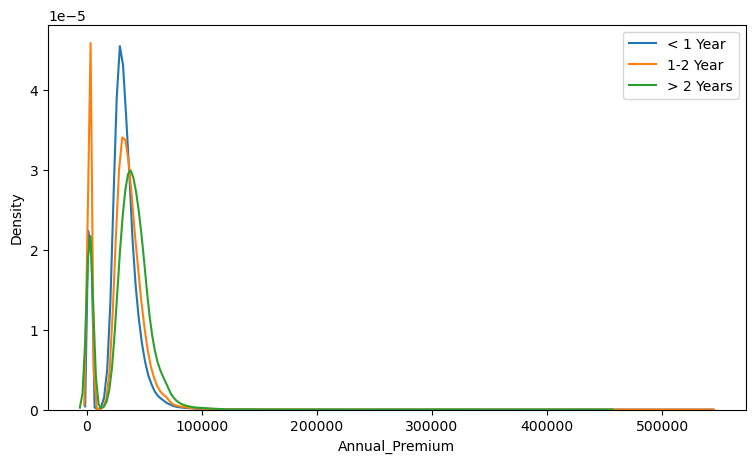

In [86]:
# Let's plot the KDE for Annual Premium based on vehicle age

f, ax = plt.subplots(1, 1, figsize = (9,5))
sns.kdeplot(df_train[df_train.Vehicle_Age == '< 1 Year']["Annual_Premium"], ax = ax)
sns.kdeplot(df_train[df_train.Vehicle_Age == '1-2 Year']["Annual_Premium"], ax = ax)
sns.kdeplot(df_train[df_train.Vehicle_Age == '> 2 Years']["Annual_Premium"], ax = ax)
plt.legend(['< 1 Year', '1-2 Year', '> 2 Years'])
plt.show()

Most of the cars are less than 2 years old

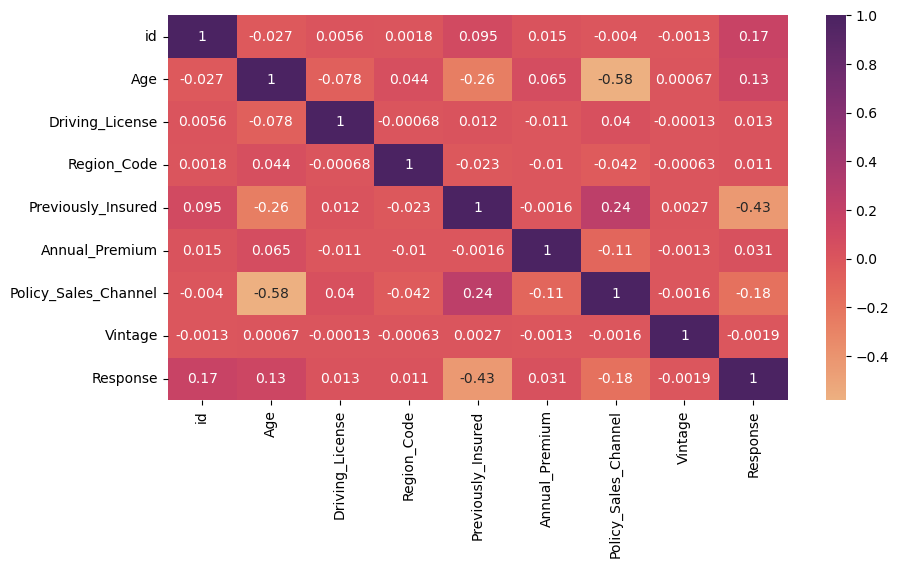

In [94]:
# Let's create a HeatMap to correlate numerical features

plt.figure(figsize=(10,5))
corr = df_train[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='flare');